In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
x=pd.read_csv('/content/gdrive/MyDrive/features_data.csv')
y=pd.read_csv('/content/gdrive/MyDrive/classes.csv')

In [ ]:
x.shape


(7140, 2200)

In [ ]:
y.shape

(7140, 1)

In [ ]:
#split data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, shuffle=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4783, 2200)
(2357, 2200)
(4783, 1)
(2357, 1)


In [ ]:
#convert pandas dataframe ro array to feed it to keras model
x_train_t=x_train.to_numpy()

In [ ]:
y_train_t=y_train.to_numpy()

In [ ]:
display(x_train_t)

In [ ]:
x_train_t.shape

(4783, 2200)

In [ ]:
x_test_t=x_test.to_numpy()
y_test_t=y_test.to_numpy()

In [ ]:
#build DL model

In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense
print('done')

done


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=2200, units=2200, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=60, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2200)              4842200   
_________________________________________________________________
dense_1 (Dense)              (None, 60)                132060    
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                671       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

In [ ]:
history=classifier.fit(x_train_t, y_train_t,validation_split=0.1, batch_size=32,epochs=100, verbose=1,shuffle=True)

Epoch 1/100
135/135 [==============================] - 4s 33ms/step - loss: 0.0892 - accuracy: 0.9554 - val_loss: 0.0652 - val_accuracy: 0.9666
Epoch 2/100
135/135 [==============================] - 4s 32ms/step - loss: 0.0903 - accuracy: 0.9566 - val_loss: 0.0688 - val_accuracy: 0.9645
Epoch 3/100
135/135 [==============================] - 4s 32ms/step - loss: 0.0849 - accuracy: 0.9586 - val_loss: 0.0781 - val_accuracy: 0.9624
Epoch 4/100
135/135 [==============================] - 4s 32ms/step - loss: 0.0890 - accuracy: 0.9586 - val_loss: 0.0785 - val_accuracy: 0.9645
Epoch 5/100
135/135 [==============================] - 4s 32ms/step - loss: 0.0895 - accuracy: 0.9540 - val_loss: 0.0764 - val_accuracy: 0.9666
Epoch 6/100
135/135 [==============================] - 4s 32ms/step - loss: 0.0881 - accuracy: 0.9570 - val_loss: 0.0797 - val_accuracy: 0.9582
Epoch 7/100
135/135 [==============================] - 4s 32ms/step - loss: 0.0883 - accuracy: 0.9568 - val_loss: 0.0778 - val_accuracy:

In [ ]:
classifier.save("lnk_class_weight.h5")

In [ ]:
Y_pred =classifier.predict(x_test_t)

In [ ]:
Y_pred=Y_pred.round()
Y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score( y_test_t,Y_pred))

0.8341111582520153


In [ ]:
pd_y_predict=pd.DataFrame(Y_pred)

In [ ]:
pd_y_predict.to_csv("predicted_values.csv",index=False)

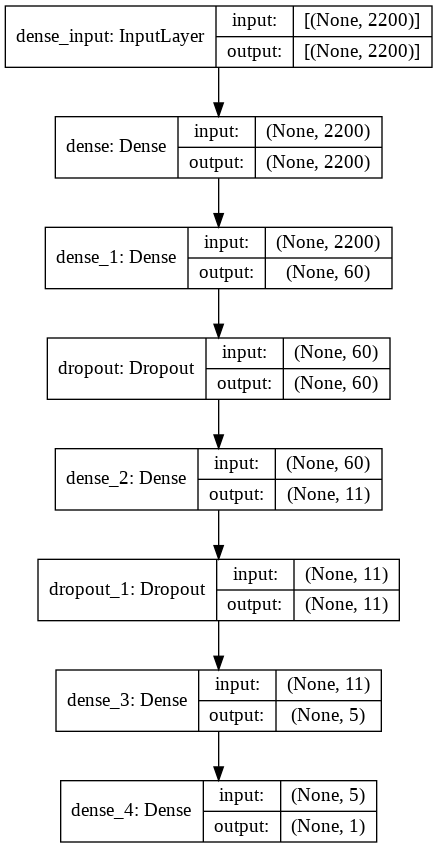

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

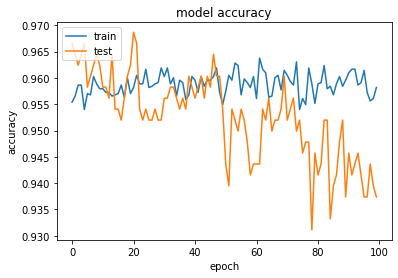

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()